# Importing packages

In [1]:
# For working with data

import pandas as pd 

# For spliting the data before training
    
from sklearn.model_selection import train_test_split

# For using LogisticRegression algorithm
    
from sklearn.linear_model import LogisticRegression

# For checking the accuracy of train model
    
from sklearn.metrics import accuracy_score

# Load Data

In [2]:
train = pd.read_csv('train.csv') # train data
test = pd.read_csv('test.csv') # test data


# Preview data

In [3]:
train.head() # first 5 columns of the train data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train.shape

(614, 13)

# Univariate Analysis

In [5]:
train['ApplicantIncome'].hist()

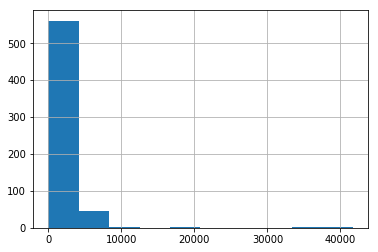

In [6]:
train['CoapplicantIncome'].hist()

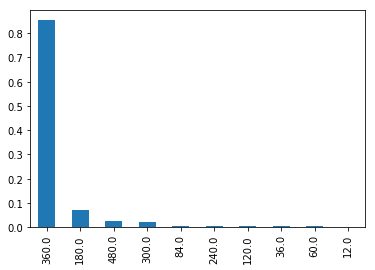

In [7]:
train['Loan_Amount_Term'].value_counts(normalize = True).plot.bar()

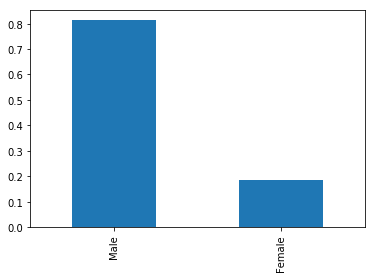

In [8]:
train['Gender'].value_counts(normalize = True).plot.bar()

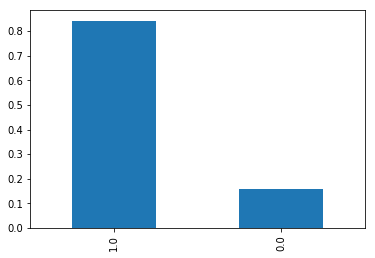

In [9]:
train['Credit_History'].value_counts(normalize = True).plot.bar()

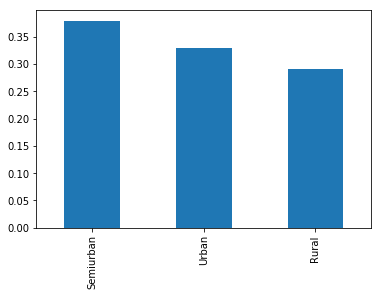

In [10]:
train['Property_Area'].value_counts(normalize = True).plot.bar()

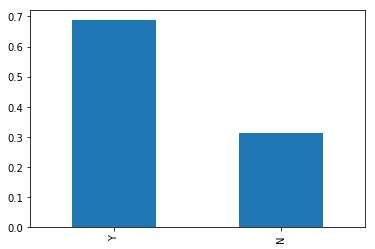

In [11]:
train['Loan_Status'].value_counts(normalize = True).plot.bar()

# Bi-variate Analysis

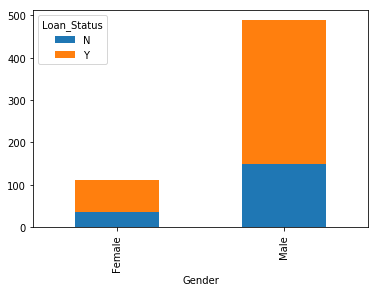

In [12]:
pd.crosstab(train['Gender'],train['Loan_Status']).plot.bar(stacked = True)


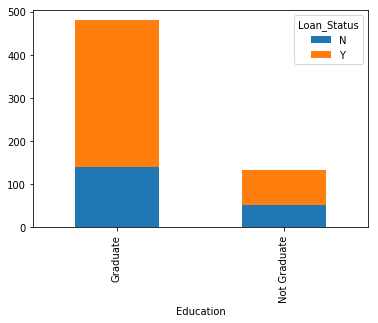

In [13]:
pd.crosstab(train['Education'],train['Loan_Status']).plot.bar(stacked = True)


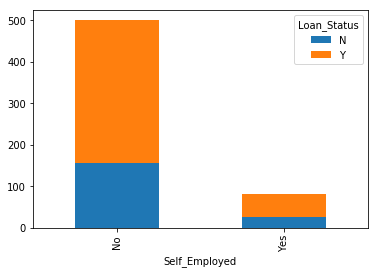

In [14]:
pd.crosstab(train['Self_Employed'],train['Loan_Status']).plot.bar(stacked = True)

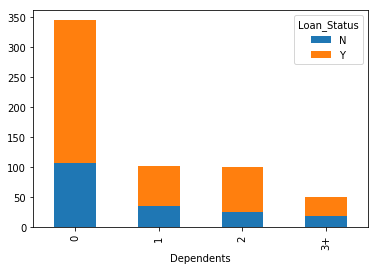

In [15]:
pd.crosstab(train['Dependents'],train['Loan_Status']).plot.bar(stacked = True)

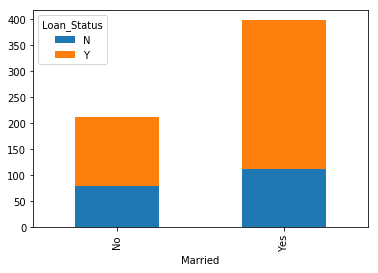

In [16]:
pd.crosstab(train['Married'],train['Loan_Status']).plot.bar(stacked = True)



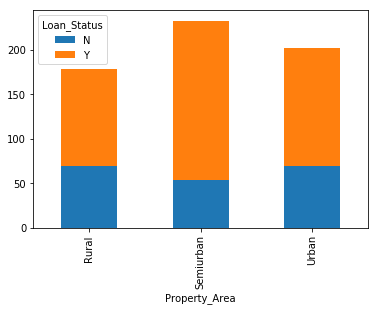

In [17]:
pd.crosstab(train['Property_Area'],train['Loan_Status']).plot.bar(stacked = True)



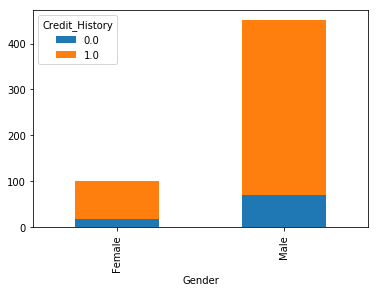

In [18]:
pd.crosstab(train['Gender'],train['Credit_History']).plot.bar(stacked = True)


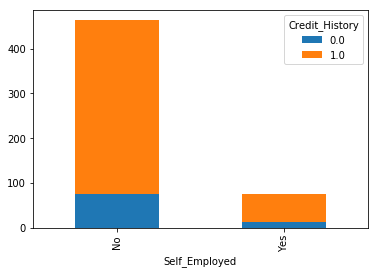

In [19]:
pd.crosstab(train['Self_Employed'],train['Credit_History']).plot.bar(stacked = True)


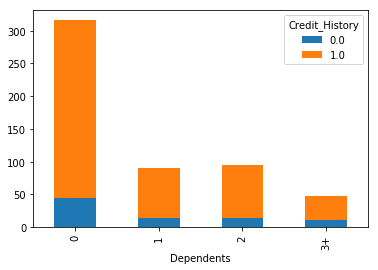

In [20]:
pd.crosstab(train['Dependents'],train['Credit_History']).plot.bar(stacked = True)

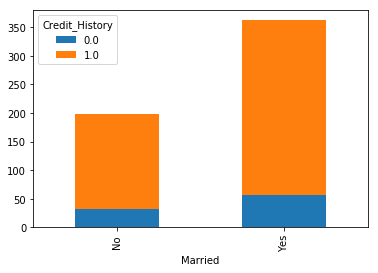

In [21]:

pd.crosstab(train['Married'],train['Credit_History']).plot.bar(stacked = True)


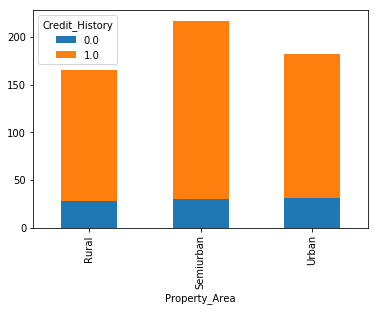

In [22]:
pd.crosstab(train['Property_Area'],train['Credit_History']).plot.bar(stacked = True)



# Finding outliers

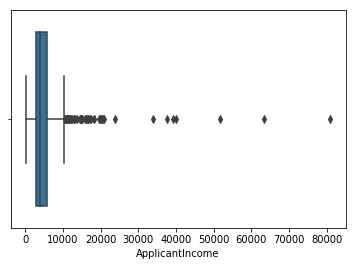

In [23]:
import seaborn as sns
sns.boxplot(train['ApplicantIncome'])


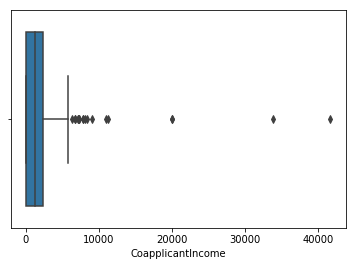

In [24]:
sns.boxplot(train['CoapplicantIncome'])

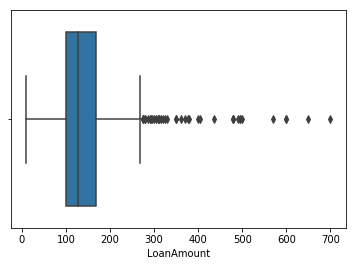

In [25]:
sns.boxplot(train['LoanAmount'])

# Dealing with outliers

In [26]:
Q1 = train.quantile(0.25) # Quartile 1
Q3 = train.quantile(0.75) # Quartile 2

In [27]:
IQR = Q3 - Q1  # Quartile Range

In [28]:
IQR

ApplicantIncome      2917.50
CoapplicantIncome    2297.25
LoanAmount             68.00
Loan_Amount_Term        0.00
Credit_History          0.00
dtype: float64

In [29]:
appl = train['ApplicantIncome']

In [30]:
outliers = (train < (Q1 - 1.5 * IQR)) | (train > (Q3 + 1.5 * IQR))

In [31]:
outliers['ApplicantIncome'].value_counts()

False    564
True      50
Name: ApplicantIncome, dtype: int64

In [32]:
outliers['LoanAmount'].value_counts()

False    575
True      39
Name: LoanAmount, dtype: int64

In [33]:
outliers['CoapplicantIncome'].value_counts()

False    596
True      18
Name: CoapplicantIncome, dtype: int64

In [34]:
train_out = train[~((train < (Q1 - 1.5 * IQR)) |(train> (Q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
train_out['ApplicantIncome'].value_counts().sum()

398

# Dealing with missing value

In [36]:

train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [37]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace = True)

In [38]:
train['Gender'].isnull().sum()

0

In [39]:
def Fill(key):
    k = str(key)
    train[k].fillna(train[k].mode()[0],inplace = True)

In [40]:
Fill('Dependents')
Fill('Education')
Fill('Married')
Fill('Self_Employed')
Fill('Credit_History')
Fill('Married')

In [41]:
def Fill_Continuous(key):
    k = str(key)
    train[k].fillna(train[k].mean(),inplace = True)

In [42]:
Fill_Continuous('LoanAmount')
Fill_Continuous('Loan_Amount_Term')


In [43]:

train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [44]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [45]:
train['Gender'].replace({'Male':0, 'Female':1},inplace = True)

train['Education'].replace({'Graduate':1,'Not Graduate':0},inplace = True)

train['Self_Employed'].replace({'Yes':0,'No':1},inplace = True)

train['Loan_Status'].replace({'Y':0,'N':1},inplace = True)


train['income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

train['Married'].replace({'Yes':0,'No':1},inplace = True)

train['Dependents'].replace({'3+':'3'},inplace= True)


In [46]:
train.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
income               float64
dtype: object

In [47]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace = True)

In [48]:
def Fill_Continuous(key):
    k = str(key)
    test[k].fillna(test[k].mean(),inplace = True)


In [49]:
def Fill(key):
    k = str(key)
    test[k].fillna(test[k].mode()[0],inplace = True)



In [50]:
Fill('Education')
Fill('Self_Employed')
Fill('Dependents')
Fill('Credit_History')

In [51]:
Fill_Continuous('LoanAmount')

Fill_Continuous('Loan_Amount_Term')

In [52]:

test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.839237
std,4910.685399,2334.232099,60.946040,64.620366,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,126.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [53]:

test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [54]:
test['Education'].replace({'Graduate':1,'Not Graduate':0},inplace = True)

test['Married'].replace({'Yes':0,'No':1},inplace = True)


test['Self_Employed'].replace({'Yes':0,'No':1},inplace = True)

test['income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

test['Gender'].replace({'Male':0, 'Female':1},inplace = True)

test['Dependents'].replace({'3+':'3'},inplace= True)





In [55]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
income               0
dtype: int64

In [56]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
income               0
dtype: int64

In [57]:
train_data = train.drop('Loan_ID',axis = 1)
test_data = test.drop('Loan_ID',axis = 1)

In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
income               614 non-null float64
dtypes: float64(5), int64(6), object(2)
memory usage: 62.4+ KB


In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null object
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
income               367 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 34.5+ KB


# creating model 

In [60]:
#predictor  variable

X = train_data.drop('Loan_Status',1) 

#target variable

Y = train_data.Loan_Status 

In [61]:
# creating dummies data

X = pd.get_dummies(X)
train_dummies = pd.get_dummies(train_data)
test_dummies = pd.get_dummies(test_data)


In [62]:
train_data.shape

(614, 13)

In [63]:
test_data.shape

(367, 12)

In [64]:
train_dummies.shape

(614, 18)

In [65]:
test_dummies.shape

(367, 17)

In [66]:
#spliting data

x_train,x_cv,y_train,y_cv = train_test_split(X,Y,test_size = 0.3)

In [67]:
#fiting data to model

model = LogisticRegression()
model.fit(x_train,y_train)


/home/vivek/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
#predicting data on test data

pred_cv = model.predict(x_cv) 

In [69]:
#checking accuracy of model

accuracy_score(y_cv,pred_cv)

0.8324324324324325

In [70]:
#predicting data on test dummies data

pred_test = model.predict(test_dummies)


# creating csv files

In [71]:
#imporing sample submission csv

submission=pd.read_csv("sample_submission.csv")

In [72]:
#putting values of predicted values on test dummies

submission['Loan_Status']=pred_test 

In [73]:
#taking loan id from test data and saving 

submission['Loan_ID']=test['Loan_ID']

In [74]:
#replacing 0 with N and 1 with Y

submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [75]:
#Exporting data to csv

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')